In [1]:
import pandas as pd

def read_bench_data(files: list[str]) -> pd.DataFrame:
    if len(files) == 0:
        return pd.DataFrame()
    df = pd.read_csv(files[0])
    df = df.rename(columns={df.columns[1]: "algo1"})
    for i, f in enumerate(files[1:]):
        df2 = pd.read_csv(f)
        df2 = df2.rename(columns={df2.columns[1]: f"algo{i+2}"})
        df = df[df.columns[0:2]].merge(df2, on=df.columns[0])
    return df

def plot_bench_data(df: pd.DataFrame, title: str) -> None:
    res = df.plot(x=df.columns[0], marker='o', figsize=(15, 10), colormap='tab20',
                  title=title, xlabel="K", ylabel="Time (ms)").get_figure()
    res.savefig(f"../../report/Figures/{title}.png", bbox_inches='tight', dpi=300, transparent=True)

algo1/Amazon0302.csv algo2/Amazon0302.csv
algo1/cit-Patents.csv algo2/cit-Patents.csv
algo1/tech-as-skitter.csv algo2/tech-as-skitter.csv
algo1/web-Google.csv algo2/web-Google.csv
algo1/WikiTalk.csv algo2/WikiTalk.csv


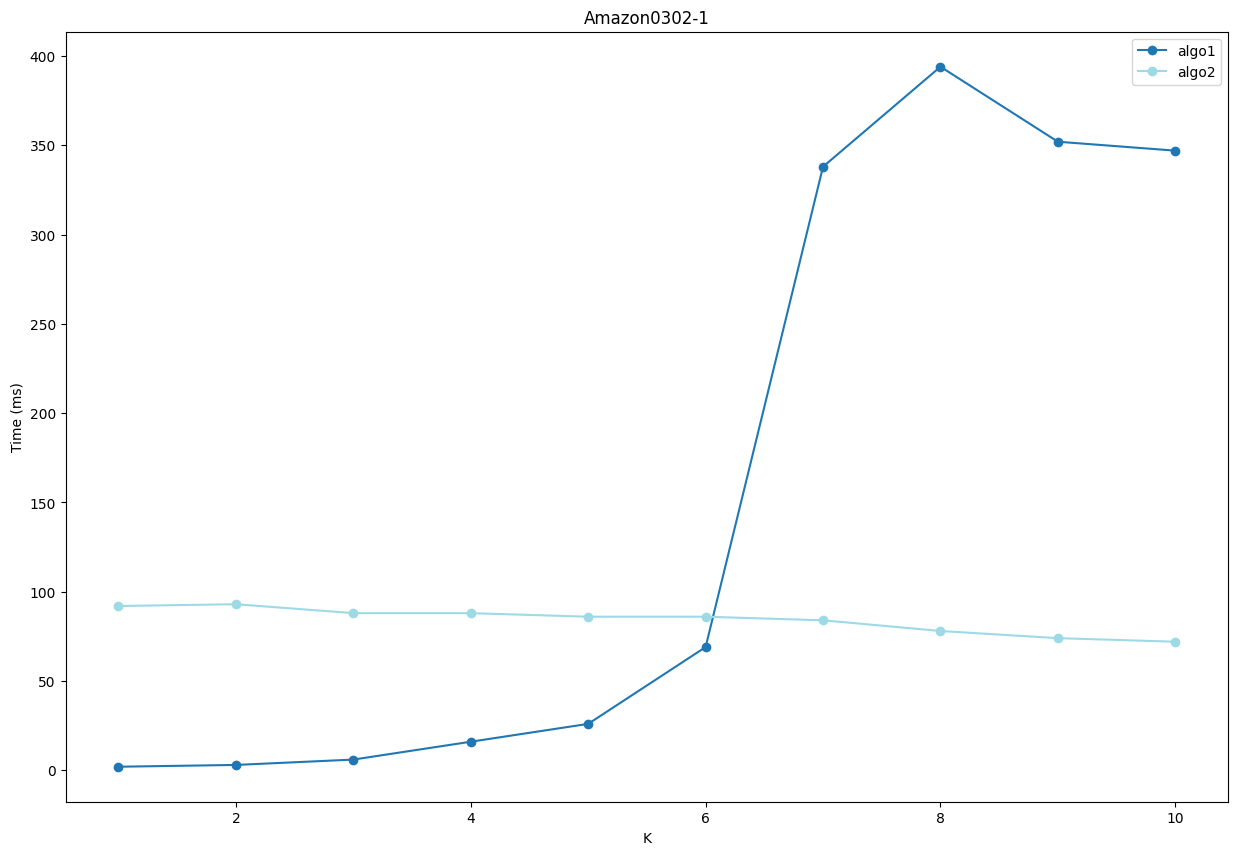

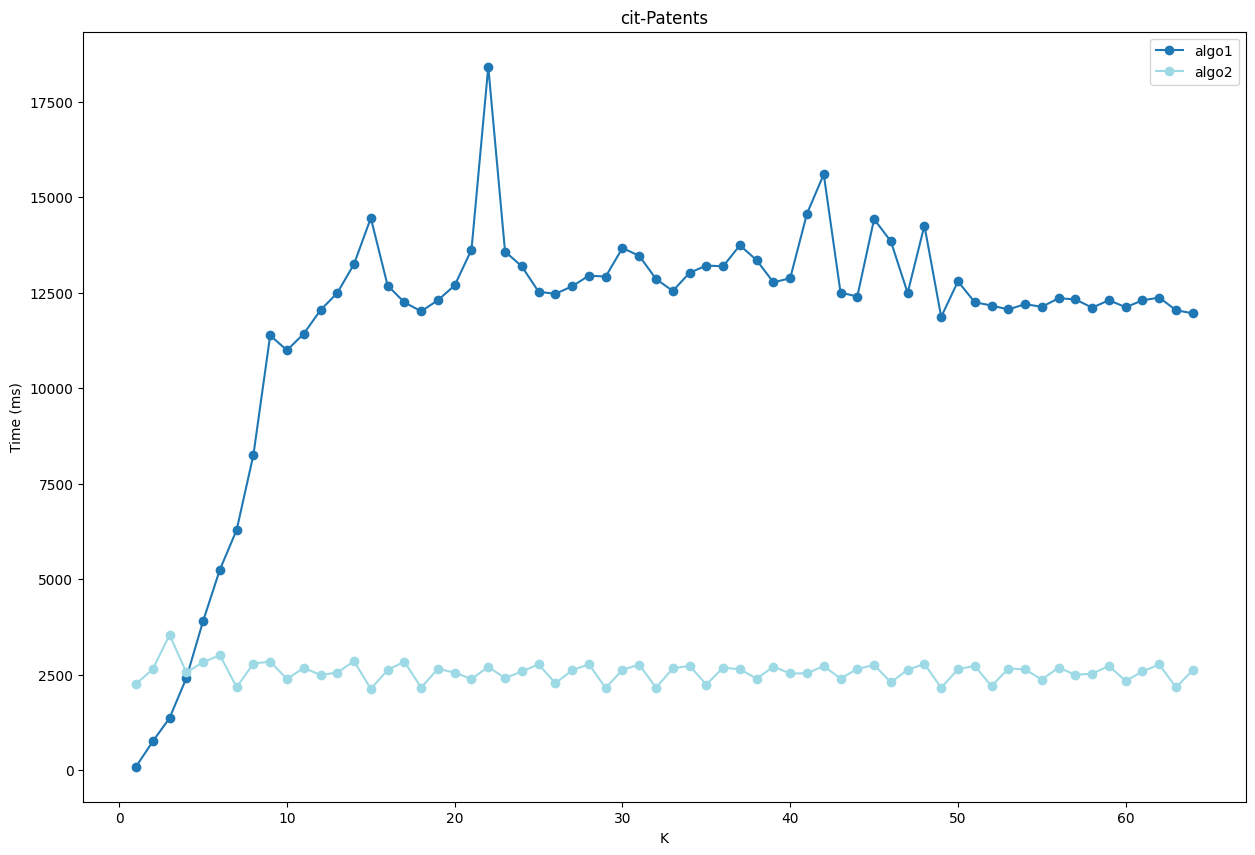

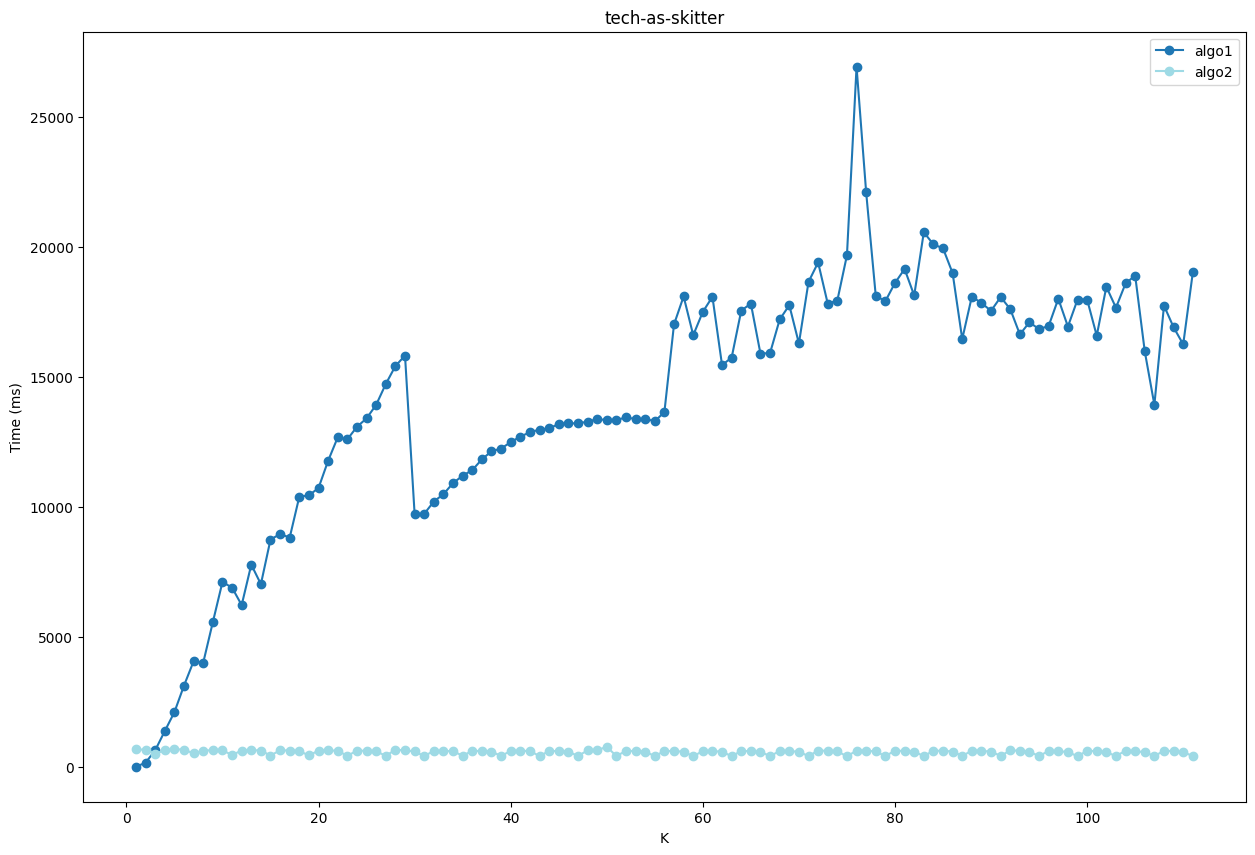

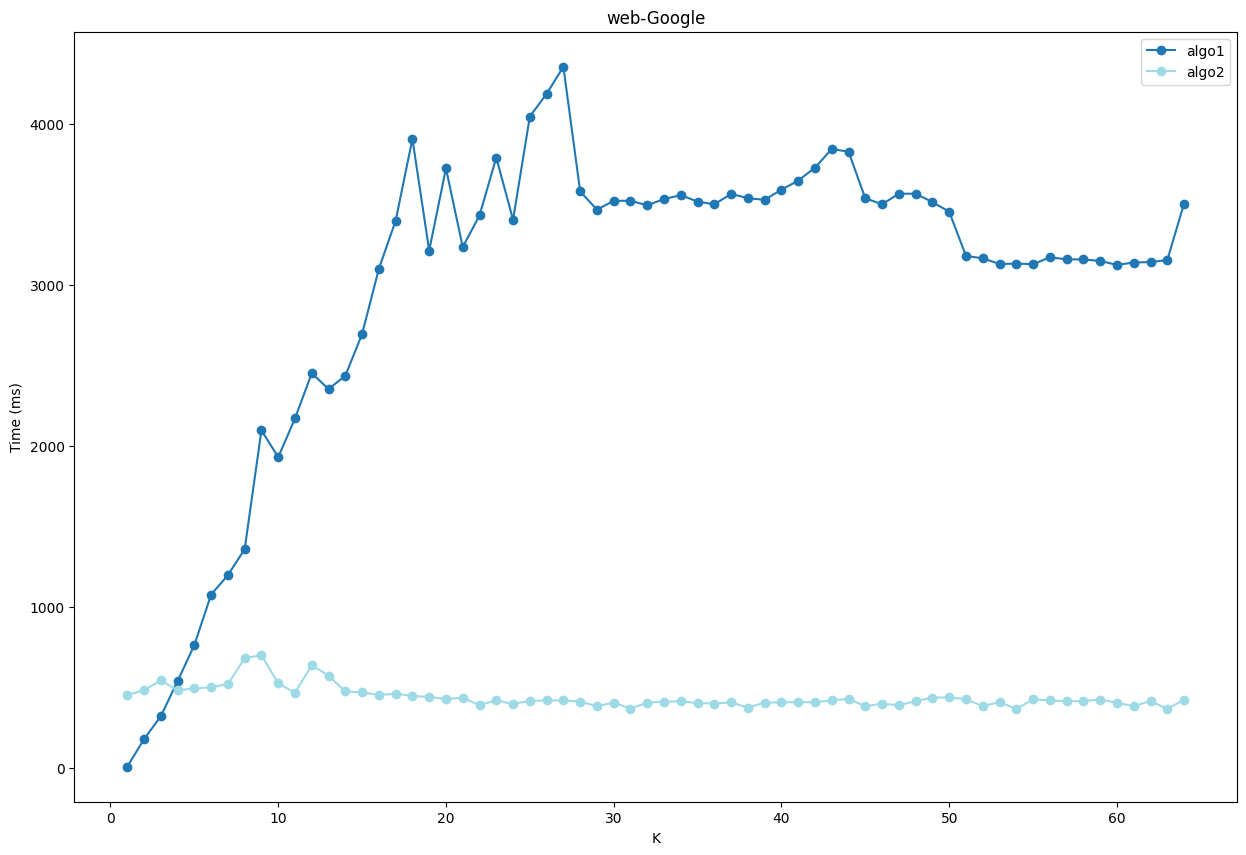

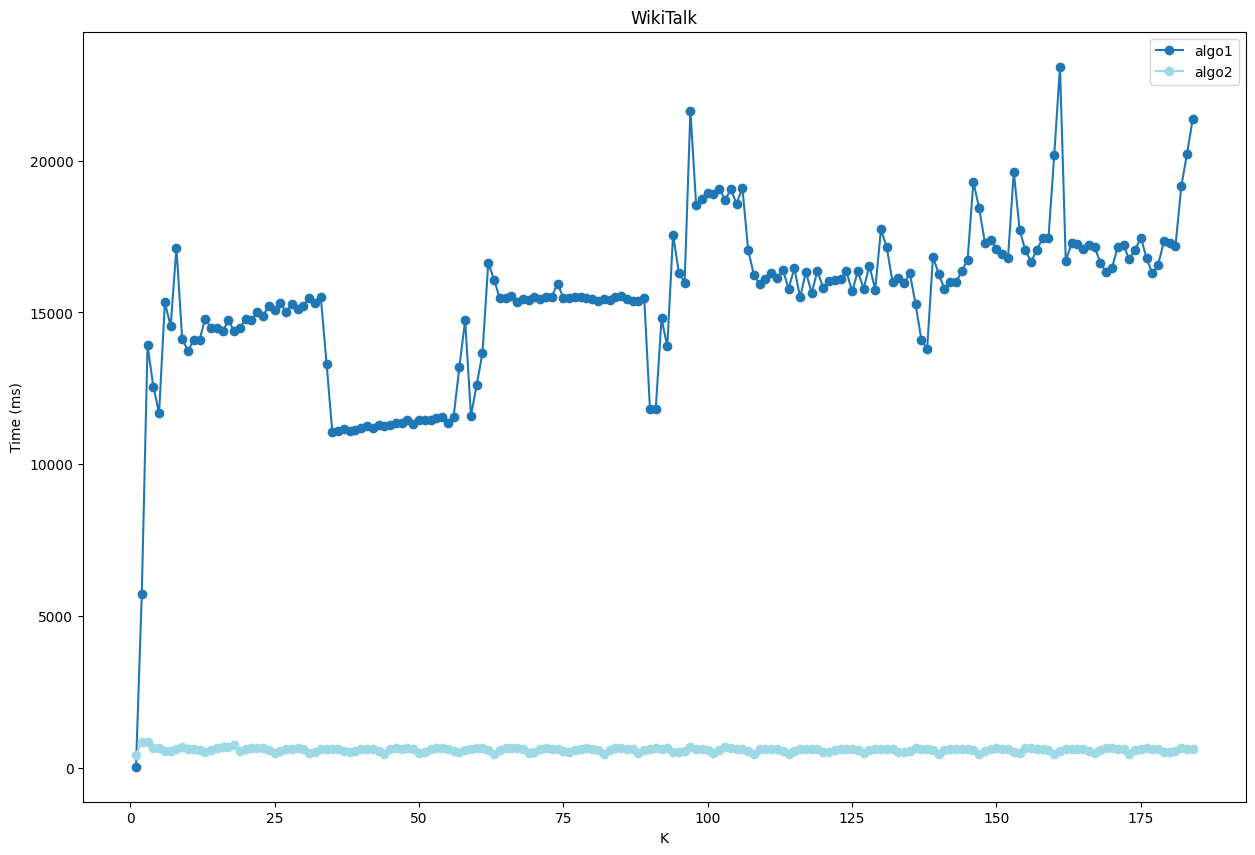

In [2]:
benchmarks = [
    (
        "Amazon0302-1",
        "algo1/Amazon0302.csv",
        "algo2/Amazon0302.csv",
    ),
    (
        "cit-Patents",
        "algo1/cit-Patents.csv",
        "algo2/cit-Patents.csv",
    ),
    (
        "tech-as-skitter",
        "algo1/tech-as-skitter.csv",
        "algo2/tech-as-skitter.csv",
    ),
    (
        "web-Google",
        "algo1/web-Google.csv",
        "algo2/web-Google.csv",
    ),
    (
        "WikiTalk",
        "algo1/WikiTalk.csv",
        "algo2/WikiTalk.csv",
    ),
]

for name, f1, f2 in benchmarks:
    print(f1, f2)
    df = read_bench_data([f1, f2])
    plot_bench_data(df, name)